# Pandas

Pandas is a powerful library for data manipulation and analysis in Python. It is widely used in a range of fields, including data science, finance, and statistics.

## 005. How to Iterate Over Rows in pandas, and Why You Shouldn't

Source: <https://realpython.com/pandas-iterate-over-rows/>

## 005.000 Assets

"005_urls.csv"

|    | name      | url                             |   total_views |
|----|-----------|---------------------------------|---------------|
|  0 | Google    | https://www.google.com          |   5.20727e+11 |
|  1 | YouTube   | https://www.youtube.com         |   2.35813e+11 |
|  2 | Facebook  | https://www.facebook.com        |   2.23016e+11 |
|  3 | Yahoo     | https://www.yahoo.com           |   1.25654e+11 |
|  4 | Wikipedia | https://www.wikipedia.org       |   4.46736e+10 |
|  5 | Baidu     | https://www.baidu.com           |   4.40976e+10 |
|  6 | Twitter   | https://twitter.com             |   3.09868e+10 |
|  7 | Yandex    | https://yandex.com              |   2.85798e+10 |
|  8 | Instagram | https://www.instagram.com       |   2.62152e+10 |
|  9 | AOL       | https://www.aol.com             |   2.32123e+10 |
| 10 | Netscape  | https://www.netscape.com        |   5.75e+06    |
| 11 | Nope      | https://alwaysfails.example.com |   0           |

"005_products.csv"
|    | month    |   sales |   unit_price |
|----|----------|---------|--------------|
|  0 | january  |       3 |         0.5  |
|  1 | february |       2 |         0.53 |
|  2 | march    |       5 |         0.55 |
|  3 | april    |      10 |         0.71 |
|  4 | may      |       8 |         0.66 |

In [49]:
import sys
from pathlib import Path

current_dir = Path().resolve()
while current_dir != current_dir.parent and current_dir.name != "katas":
    current_dir = current_dir.parent
if current_dir != current_dir.parent:
    sys.path.append(current_dir.as_posix())


In [55]:
import pandas as pd
import perfplot

from codetiming import Timer

from lib.utils import fresh_df
from IPython.core.interactiveshell import InteractiveShell

pd.set_option('display.max_rows', None)
InteractiveShell.ast_node_interactivity = "all"

### 005.001 How to Iterate Over DataFrame Rows in pandas

1. Define a function check_connection which
   1. takes a name and url
   1. Uses httpx to make a get request to url, and prints a success message
   1. ..or a failureone if there is a ConnectError
1. Iterate over urls_df with itertuples and try each url


In [74]:
import httpx

data_file = "005_urls.csv"
urls_df = pd.read_csv(data_file, index_col=0)
# solution

1
def check_connection(name, url):
    try:
        response = httpx.get(url)
        print(f"{name} is online!")
    except httpx.ConnectError:
        print(f"Failed to establish a connection with {url}")

2

for website in urls_df.itertuples():
    check_connection(website.name, website.url)

1

2

Google is online!
YouTube is online!
Facebook is online!
Yahoo is online!
Wikipedia is online!
Baidu is online!
Twitter is online!
Yandex is online!
Instagram is online!
AOL is online!
Netscape is online!
Failed to establish a connection with https://alwaysfails.example.com


dict_values([{'name': 'Google', 'url': 'https://www.google.com', 'total_views': 520726795305.0}, {'name': 'YouTube', 'url': 'https://www.youtube.com', 'total_views': 235813192004.0}, {'name': 'Facebook', 'url': 'https://www.facebook.com', 'total_views': 223015726428.0}, {'name': 'Yahoo', 'url': 'https://www.yahoo.com', 'total_views': 125654442849.0}, {'name': 'Wikipedia', 'url': 'https://www.wikipedia.org', 'total_views': 44673637102.0}, {'name': 'Baidu', 'url': 'https://www.baidu.com', 'total_views': 44097593606.0}, {'name': 'Twitter', 'url': 'https://twitter.com', 'total_views': 30986763501.0}, {'name': 'Yandex', 'url': 'https://yandex.com', 'total_views': 28579800000.0}, {'name': 'Instagram', 'url': 'https://www.instagram.com', 'total_views': 26215196370.0}, {'name': 'AOL', 'url': 'https://www.aol.com', 'total_views': 23212320843.0}, {'name': 'Netscape', 'url': 'https://www.netscape.com', 'total_views': 5750000.0}, {'name': 'Nope', 'url': 'https://alwaysfails.example.com', 'total_vi

### 005.002 Using Vectorized Methods Over Iteration

Find the sum of the `total_views` column of in three ways, and measure how long it takes for each approach

1. Create a function `loop_sum` which is passed a df and uses itertuples to iterate; keep a running total
1. Create a function `python_sum` which does the same with an array comprehension and the appropriate aggregate function
1. Create a function `reduce_sum` which does the same with reduce
1. Finally, a function `pandas_sum` which uses pandas vectorized aggregate function
1. Create a list with all the four fuctions and loop through it. At each iteration...
   1. Load a fresh version of the csv into a df
   1. Append it to the df 10000 times
   1. Create a Timer context, and pass it the function name as `name`, and `timer_text` as `text`
   1. In the context, run the function with the extended df as argument
1. Create a function `get_row` which
   1. Takes an integer n as argument
   1. Loads data_file into a df
   1. If n is smaller than the df length, returns row n
   1. If not it appends the df to itself enough times until n is in range, then returns row n
1. Create a perfplot benchmark, with `get_row` as the setup, n_range you can pass the variable. For some reason labels, title, xlabel doesn't work if not defined directly (maybe a jupyter bug), so copy them

1

1302981218008.0

2

3

4

5

1.3029812180067652e+16

loop_sum            : 41.79 ms


1.3029812180067652e+16

python_sum          : 43.78 ms


1.3029812180067652e+16

reduce_sum          : 11.31 ms


1.3029812180080002e+16

pandas_sum          : 1.63 ms


6

7

Output()

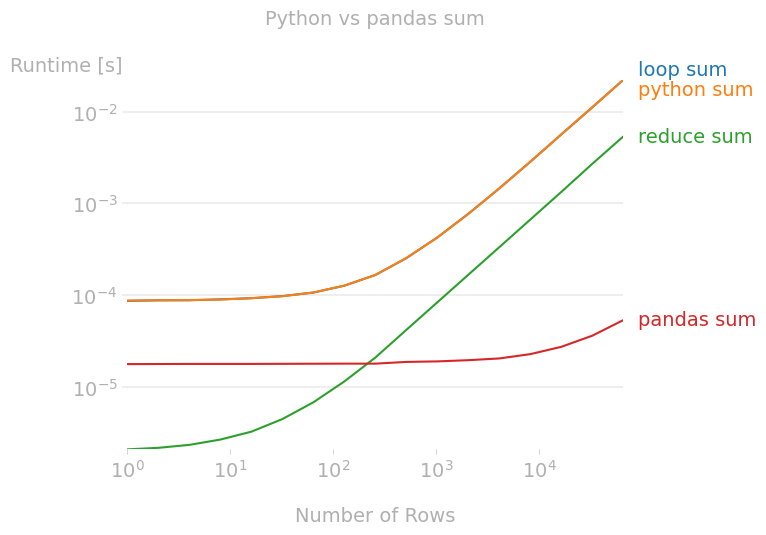

In [78]:
from functools import reduce

data_file = "005_urls.csv"
timer_text = "{name:20}: {milliseconds:.2f} ms"

n_range = [2**i for i in range(17)]
labels=["loop sum", "python sum", "reduce sum", "pandas sum"],
title="Python vs pandas sum",
xlabel="Number of Rows",
# solution

1
def loop_sum(websites):
    total = 0
    for website in websites.itertuples():
        total += website.total_views
    return total
loop_sum(urls_df)

2
def python_sum(websites):
    return sum(website.total_views for website in websites.itertuples())

3
def reduce_sum(websites):
    return reduce(lambda accumulator, current: accumulator + current, websites['total_views'])

4
def pandas_sum(websites):
    return websites["total_views"].sum()

5
for func in [loop_sum, python_sum, reduce_sum, pandas_sum]:
    urls_df = pd.read_csv(data_file, index_col=0)
    websites = pd.concat([urls_df for _ in range(10000)])
    with Timer(name=func.__name__, text=timer_text):
        func(websites)
        
6
def get_row(n):
    websites = pd.read_csv(data_file, index_col=0)
    if n < len(websites):
        return websites.iloc[:n]
    return pd.concat([websites for _ in range((n // len(websites)) + 1)]).iloc[
        :n
    ]

7
plot = perfplot.show(
    n_range=n_range,
    setup=get_row,
    kernels=[loop_sum, python_sum, reduce_sum, pandas_sum],
    labels=["loop sum", "python sum", "reduce sum", "pandas sum"],
    title="Python vs pandas sum",
    xlabel="Number of Rows",
)


### 005.003 Use Intermediate Columns So You Can Use Vectorized Methods

The cumulative sales price is obtained by multiplying sales * unit_price for each row, and then
each row includes the sum of the current rows and all the ones above it. Some people believe that
in cases like this loops are ok, but vectorisation is much faster the bigger the dataframe. The
trick is to create intermediate columns.

Here the task is to add a column `cumulative_income` to the df.

1. Create a function `loop_cumsum` which takes a df as arg, and uses itertuples to push the result of the multiplication to a list. At the end, append the list to the df as a new column
1. Create a function pandas_cumsum which takes a df as arg, appends a column called 'income' which is the result of the multiplication, and then cumulative_income which is as the name implies. The remove the income column at the end
1. Create a list of both function, and loop through each:
   1. Reads the csv file into a df
   1. Appends it to itself 10000 times
   1. Create a Timer context, and pass it the function name as `name`, and `timer_text` as `text`
   1. In the context, run the function with the extended df as argument
1. Create a perfplot benchmark, reusing `get_row` from above as the setup (it works because data_file is still a variable), n_range you can pass the variable. For some reason labels, title, xlabel doesn't work if not defined directly (maybe a jupyter bug), so copy them


1

2

3

,month,sales,unit_price,cumulative_income
0,january,3,0.50,1.50
1,february,2,0.53,2.56
2,march,5,0.55,5.31
3,april,10,0.71,12.41
4,may,8,0.66,17.69


loop_cumsum         : 27.44 ms


,month,sales,unit_price,cumulative_income
0,january,3,0.50,1.50
1,february,2,0.53,2.56
2,march,5,0.55,5.31
3,april,10,0.71,12.41
4,may,8,0.66,17.69


pandas_cumsum       : 5.39 ms


4

Output()

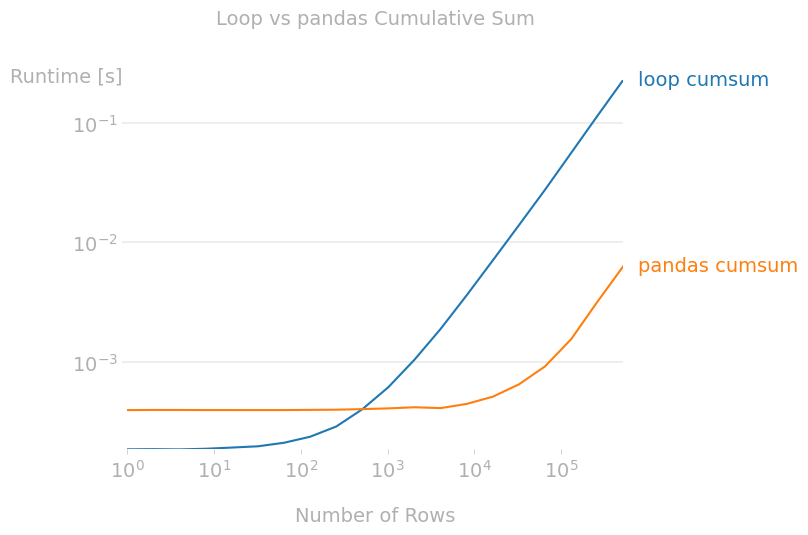

In [77]:
from codetiming import Timer

data_file = "005_products.csv"
timer_text = "{name:20}: {milliseconds:.2f} ms"

n_range = [2**i for i in range(20)]
labels=["loop cumsum", "pandas cumsum"],
title="Loop vs pandas cumulative sum",
xlabel="Number of Rows",
# solution

1
def loop_cumsum(products):
    cumulative_sum = []
    for product in products.itertuples():
        income = product.sales * product.unit_price
        if cumulative_sum:
            cumulative_sum.append(cumulative_sum[-1] + income)
        else:
            cumulative_sum.append(income)
    result = products.assign(cumulative_income=cumulative_sum).head()
    return result.head()

2
def pandas_cumsum(products):
    result = products.assign(
        income=lambda df: df["sales"] * df["unit_price"],
        cumulative_income=lambda df: df["income"].cumsum(),
    ).drop(columns="income")
    return result.head()

3
for func in [loop_cumsum, pandas_cumsum]:
    products = pd.read_csv(data_file)
    products = pd.concat(products for _ in range(10000))
    with Timer(name=func.__name__, text=timer_text):
        func(products)
        
4
plot = perfplot.show(
    n_range=n_range,
    setup=get_row,
    kernels=[loop_cumsum, pandas_cumsum],
    labels=["loop cumsum", "pandas cumsum"],
    title="Loop vs pandas Cumulative Sum",
    xlabel="Number of Rows",
)

### 005.004 Complex string replace on a whole column with various methods

In the dataset, in the `place_of_publication` column, you've got entries like
these:

London
London; Virtue & Yorston
Oxford
pp. 40. G. Bryan & Co: Oxford, 1898
Plymouth
pp. 40. W. Cann: Plymouth, [1876?]

Most of these are just city names, but some have additional and unwanted
information. For these, you want to detect if it has one of the city names,
replacing the whole value with just the city name.

1. Create a function `clean_pub_replace` which takes a df as arg, and
   1. iterates through CITIES, and for each city replaces in the column the regex `rf".*{city}.*"` on the whole city
1. Create a function `clean_pub_apply` which takes a df as arg, and
   1. iterates through CITIES, and for each city uses apply to run a simple lambda (using a simple in check) to the column
1. Create a function `clean_pub_itertuples` which takes a df as arg, and uses an array comprehension to loop through the row with itertuples and applies `_replace_city` to it
1. Create a function `clean_pub_iterrows` which does the same but with iterrows
1. Create a function `clean_pub_list_comp` which does the same but directly on the df column
1. Create a perfplot benchmark, reusing `get_row` from above as the setup (it works because data_file is still a variable), n_range you can pass the variable. Plot it twice, once default and once with logarithm y axis

1

2

3

4

5

6

Output()

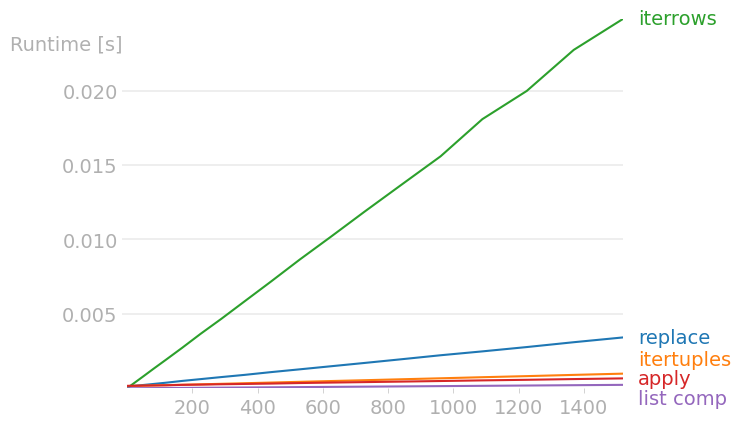

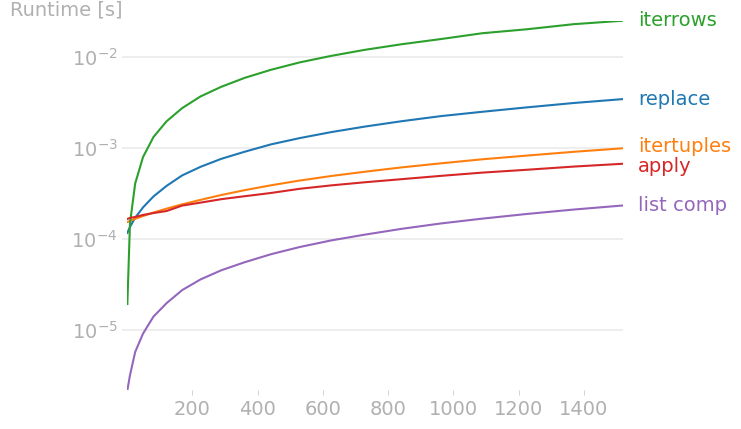

In [83]:
data_file = "005_books.csv"
CITIES = ["London", "Plymouth", "Oxford", "Boston"]
column_name = "place_of_publication"

def _replace_city(text):
    for city in CITIES:
        if city in text:
            return city
    return text

n_range = [i**2 for i in range(1, 40, 2)]
# solution



1
def clean_pub_replace(df):
    col = df[column_name]
    for city in CITIES:
        col = col.replace(rf".*{city}.*", city, regex=True)
    return col

2
def clean_pub_apply(df):
    col = df[column_name]
    for city in CITIES:
        col = col.apply(lambda val: city if city in val else val)
    return col

3
def clean_pub_itertuples(df):
    return [_replace_city(row.place_of_publication) for row in df.itertuples()]

4
def clean_pub_iterrows(df):
    return [
        _replace_city(row[column_name]) for _, row in df.iterrows()
    ]

5
def clean_pub_list_comp(df):
    return [_replace_city(place) for place in df[column_name]]

6
plot = perfplot.bench(
    setup=get_row,
    kernels=[
        clean_pub_replace,
        clean_pub_itertuples,
        clean_pub_iterrows,
        clean_pub_apply,
        clean_pub_list_comp,
    ],
    labels=["replace", "itertuples", "iterrows", "apply", "list comp"],
    n_range=n_range,
    equality_check=None,
)

plot.show()
plot.show(logy=True)